# **Prevendo o *Churn* utilizando *Machine Learning***

A taxa de *churn*, também chamado taxa de atrito ou rotatividade de cliente, é a taxa na qual clientes para de fazer negócios com uma entidade, ou seja, a taxa de evasão dos clientes. Em serviços por assinatura como Spotify, Netflix ou TV por assinatura, ela seria representada pelos clientes que cancelaram a assinatura em determinado período.

Uma empresa pode utilizar o *churn* para comparar com a taxa de crescimento e determinar se a empresa está tendo ganhos ou perdas. Além disso, a melhor taxa de *churn* é que ele não ocorra, no entanto é quase impossível que isso ocorra e é muito difícil estimar um valor que seja verdadeiro para todos os tipos de negócios, mas, por exemplo, para SaaS o *churn* sugerido fica entre 5% e 7% ao ano.

Um questionamento importante a se fazer é: **quais são os motivos para o *churn* acontecer?**
- Entrega de valor menor do que foi prometido;
- A reputação do produto está manchada;
- Os clientes encontraram uma alternativa nos concorrentes;
- Os clientes não necessitam ou não têm mais insteresse no produto;
- Cliente encerrou a operação que necessitava do produto; e
- Muitos outros motivos.

**Mas como um modelo de *Machine Learning* pode auxiliar com o *churn*?**

Construindo um modelo de *Machine Learning* utilizando dados dos clientes que pararam de fazer negócios na empresa, podemos prever quais clientes ainda fazem negócios, no entanto estão prestes a parar e, assim, tomar as medidas necessárias para que esses clientes continuem com a empresa.

Por isso, o objetivo desse projeto é avaliar diferentes modelos de *Machine Learning* e analisar qual que apresenta os melhores resultados para prever o *churn* do conjunto de dados utilizado.

## **Obtenção dos Dados**

O conjunto de dados utilizado neste projeto foram, originalmente, disponibilizados pela [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e é referente a um problema comum em uma empresa de telecomunicações.

O conjunto de dados completo está disponível nesse [link]().

Além disso, não são disponibilizadas informações explícitas sobre o conjunto de dados, no entanto com os nomes das colunas podemos ter um maior entendimento a respeito do problema.

## **Importando as bibliotecas**

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_auc_score, confusion_matrix
from yellowbrick.classifier import ROCAUC
from imblearn.under_sampling import RandomUnderSampler

# Configurando o notebook
sns.set(style="white")
%matplotlib inline

# Removendo avisos
import warnings
warnings.filterwarnings("ignore")

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Carregando o conjunto de dados**

In [2]:
# Carregando os dados
df = pd.read_csv("./Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Visualizando as 5 primeiras do conjunto de dados
print("As 5 primeiras entradas do conjunto de dados:\n")
df.head()

As 5 primeiras entradas do conjunto de dados:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Análise Exploratória dos Dados**

**01 - Nomes das Colunas**

In [3]:
# Colunas
pd.DataFrame(df.columns)

,0
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


Pelos nomes das colunas, já podemos ter um maior entendimento sobre o conjunto de dados:
- A coluna `customerID` nada agrega ao nosso projeto, pois é apenas um código de identificação dos clientes;
- A coluna `Churn` identifica se o cliente deixou ou não de utilizar o serviço da empresa;
- Também temos colunas que identificam algumas características dos clientes como Gênero (`gender`); se é idoso ou não (`SeniorCitizen`); e se tem dependentes (`Dependents`);
- Além disso, temos colunas que indicam os tipos de serviços, a forma de pagamento e como é feito a cobrança dos clientes;
- Ainda, a variável `tenure` está relacionada com o tempo em que a pessoa utiliza determinado serviço, ou seja, isso pode indicar a fidelidade do cliente.

**02 - Tipo de cada coluna**

In [4]:
# Tipo dos atributos
pd.DataFrame(df.dtypes)

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Como podemos perceber, a variável `TotalCharges` aparenta estar com o tipo incorreto, pois pelas primeiras entradas dela percebemos que é do numérica, no entanto quando verificamos usando a função **dtypes**, ela aparece como *object*. Portanto, vamos verificar melhor a variável `TotalCharges`.

Vamos converter a variável `TotalCharges` para float64:

In [5]:
# Convertendo TotalCharges
# df["TotalCharges"].astype('float64')

Quando tentamos converter a variável `TotalCharges`, aparece o seguinte erro:

> ValueError: could not convert string to float: 

Esse ocorre, normalmente, quando tentamos converter um variável do tipo *string* para uma do tipo numérico. Além disso, essas entradas não são detectados como valores ausentes, conforme podemos ver:

In [6]:
# Verificando valores ausentes na variável TotalCharges:
print("Quantidade de valores ausentes na variável TotalCharges: ", df["TotalCharges"].isnull().sum())

Quantidade de valores ausentes na variável TotalCharges:  0


Sendo assim, agora vamos transformar as variáveis que são numéricas em *float64* e as que são *string* em valor ausente (np.nan). E para isso, utilizarei uma função adaptada do [Carlos Melo](https://sigmoidal.ai/):

In [7]:
def string_to_float(entrada):
    """
    Converte um objeto do tipo string para float.
    
    # Argumentos:
        entrada: objeto string ou coluna de DataFrame do tipo string
        
    # Resultados:
        Valor convertido em float, se a variáel permitir a conversão.
        NaN, caso não seja possível a conversão.
    """
    
    try:
        return float(entrada)
    except ValueError:
        return np.nan

Copiando o conjunto de dados:

In [8]:
df_clean = df.copy()

Removendo a coluna `costumerID`, pois como já foi citado anteriormente, ela não agrega valor ao nosso projeto:

In [9]:
df_clean.drop("customerID", axis=1, inplace=True)

Convertendo a coluna `TotalCharges` para *float*:

In [10]:
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(string_to_float)

Verificando se a conversão ocorreu corretamente:

In [11]:
df_clean["TotalCharges"].dtypes

dtype('float64')

Verificando a quantidade de valores ausentes na coluna `TotalCharges` antes e depois do tratamento:

In [12]:
print("Valores ausentes em TotalCharges antes:\t\t", df["TotalCharges"].isnull().sum())
print("Valores ausentes em TotalCharges depois:\t", df_clean["TotalCharges"].isnull().sum())

Valores ausentes em TotalCharges antes:		 0
Valores ausentes em TotalCharges depois:	 11


Para tratar os valores ausentes da variável `TotalCharges`, vamos substituir eles pela média da variável:

In [13]:
# Substituindo os valores ausentes pela média
TotalChargesMean = round(df_clean["TotalCharges"].mean(), 3)

df_clean["TotalCharges"].fillna(TotalChargesMean, inplace=True)

**03 - Resumo estatístico das variáveis numéricas**

In [14]:
print("Resumo estatístico:")
df_clean.describe()

Resumo estatístico:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Apesar da variável `SeniorCitizen` aparentar estar com problema, isso é normal, pois ela é binária, ou seja, tem apenas valores 0 e 1 sendo que 0 representa não e 1 sim.

Além disso, as variáveis `tenure`, `MontlhyCharges` e `TotalCharges` não parecem apresentar *outliers*, então faremos os boxplots para essas 3 variáveis para confirmar isso:

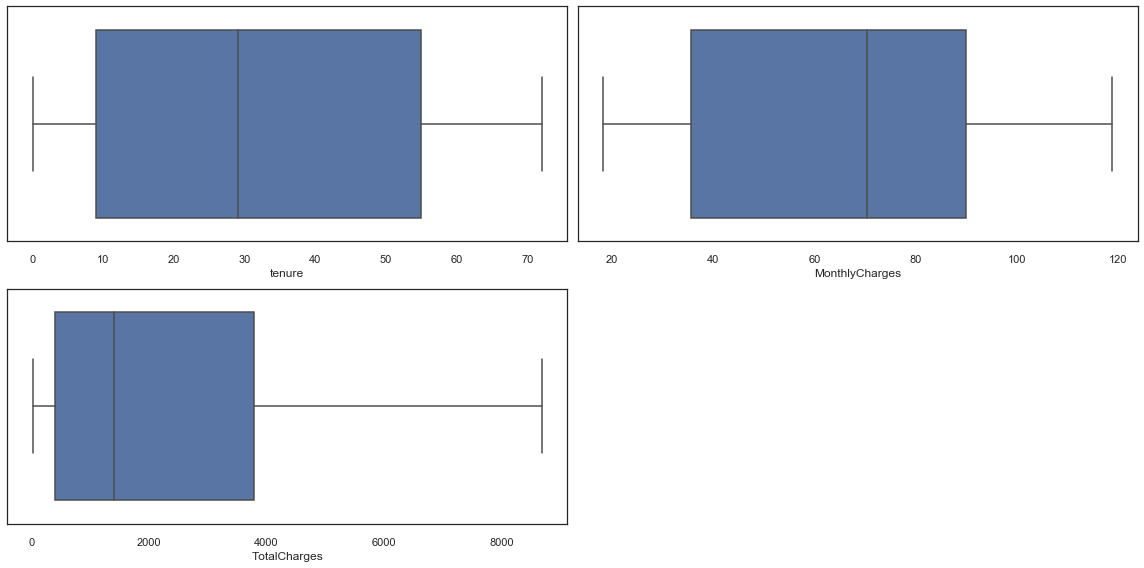

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
plt.delaxes(ax[1,1])

sns.boxplot(df_clean['tenure'], ax=ax[0,0])
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0,1])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1,0])

plt.tight_layout()

Realmente, pelos boxplots notamos que não há outliers nas variáveis `tenure`, `MonthlyCharges` e `TotalCharges`

Ainda, como a variável `tenure` está relacionada a fidelização do cliente e não havendo documentação, assumo que a unidade dessa variável é a quantidade de meses que o cliente mantém um relacionamento com a empresa. Com isso:

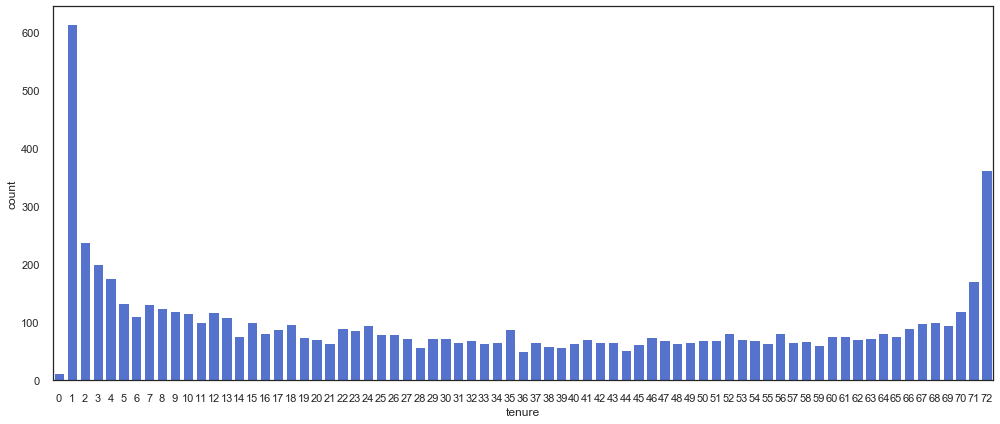

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(df["tenure"], color="royalblue")

plt.tight_layout()

**04 - Variáveis categóricas (ou não numéricas)**

Precisamos avaliar, também, as variáveis categóricas. Assim:

In [17]:
# Separando as variáveis categóricas
categoricas = df_clean.select_dtypes('object').columns

# Visualizando entradas únicas
print('\033[1m' + "Entradas únicas de cada variável categórica:\n" + '\033[0m')
for i in range(0, len(df_clean[categoricas].columns)):
    print("-", df_clean.columns[i])
    print(" ", df_clean[categoricas].iloc[:, i].unique())
    print("\n")

Entradas únicas de cada variável categórica:

- gender
  ['Female' 'Male']


- SeniorCitizen
  ['Yes' 'No']


- Partner
  ['No' 'Yes']


- Dependents
  ['No' 'Yes']


- tenure
  ['No phone service' 'No' 'Yes']


- PhoneService
  ['DSL' 'Fiber optic' 'No']


- MultipleLines
  ['No' 'Yes' 'No internet service']


- InternetService
  ['Yes' 'No' 'No internet service']


- OnlineSecurity
  ['No' 'Yes' 'No internet service']


- OnlineBackup
  ['No' 'Yes' 'No internet service']


- DeviceProtection
  ['No' 'Yes' 'No internet service']


- TechSupport
  ['No' 'Yes' 'No internet service']


- StreamingTV
  ['Month-to-month' 'One year' 'Two year']


- StreamingMovies
  ['Yes' 'No']


- Contract
  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


- PaperlessBilling
  ['No' 'Yes']




Avaliando as entradas únicas presentes nas variáveis categóricas, por exemplo, para a variável `MultipleLines` uma premissa válida a se assumir é que o valores `No` e `No internet service` são a mesma coisa, no entanto, neste projeto assumirei que são coisas diferentes e isso vale para todas as variáveis que apresentam comportamento semelhante.

**05 - Balanceamento das Variáveis**

Para verificar se há algum enviesamento nas variáveis, farei a verificação do balanceamento para as variáveis categóricas binárias (`gender`, `SeniorCitizen`, `Partner`, `Dependents` e `PaperlessBilling`). Apesar de entender que para esse problema em específico isso não trará nenhum prejuízo relevante, em outros tipos de problemas esse enviesamento pode acarretar grandes prejuízos, como, por exemplo, em casos de contratação de funcionários ou previsão de crimes.

Sendo assim, fazendo os gráficos para avaliar o balanceamento:

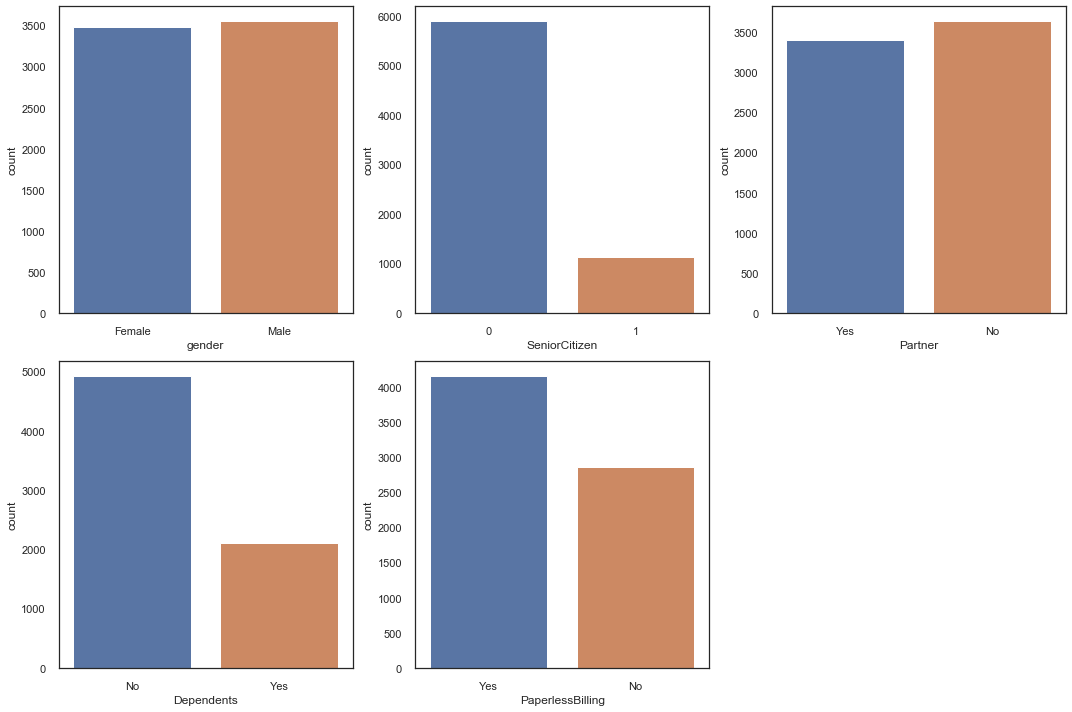

In [18]:
# Construindo a figura
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.delaxes(ax[1,2])

# gender
sns.countplot(df_clean["gender"], ax=ax[0,0])

# SeniorCitizen
sns.countplot(df_clean["SeniorCitizen"], ax=ax[0,1])

# Partner
sns.countplot(df_clean["Partner"], ax=ax[0,2])

# Dependents
sns.countplot(df_clean["Dependents"], ax=ax[1,0])

# PaperlessBilling
sns.countplot(df_clean["PaperlessBilling"], ax=ax[1,1])

plt.tight_layout()

Analisando os gráficos para verificar o balanceamento, percebemos que as variáveis que apresentam um maior desbalanceamento são `SeniorCitizen` e `Dependents`, no entanto como já citado anterior, no problema abordado nesse projeto, entendo que isso não trará prejuízos reais.

Ainda, temos que analisar o balanceamento das classes do conjunto de dados, apresentadas pela variável `Churn`.

Então, fazendo o gráfico:

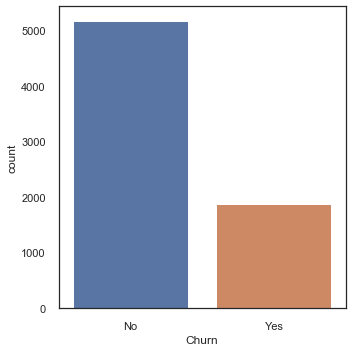

In [19]:
# Construindo a figura
fig, ax = plt.subplots(figsize=(5,5))

# Churn
sns.countplot(df["Churn"], ax=ax)

plt.tight_layout();

Pelo gráfico, percebemos que a variável `Churn` está desbalanceada e vamos fazer o tratamento dela posteriormente.

## **Preparação dos Dados**

Antes da construção do nosso modelo de *Machine Learning*, precisamos preparar o conjunto dados e para isso farei da seguinte forma:
- As variáveis que contêm duas entradas únicas, incluindo a `Churn` serão processadas utilizando o *LabelEnconder*, ou seja, serão transformados em 0 e 1;
- As variáveis que contêm mais de duas entradas únicas serão transformadas em varíaveis [*dummy*](https://medium.com/data-hackers/vari%C3%A1veis-dummy-o-que-%C3%A9-quando-usar-e-como-usar-78de66cfcca9).

Então, fazendo a transformação:

In [20]:
# Função para classificar se é int ou float ou, se nenhum deles, retorna False
def int_or_float(argumento):
    """
    Argumento -> variável para classificar.
    Se 'Argumento' for int ou float retorna True; se nenhum deles, retorna False.
    """
    if pd.api.types.is_integer_dtype(argumento):
        return True
    elif pd.api.types.is_float_dtype(argumento):
        return True
    else:
        return False

In [21]:
# Separando as variáveis em binárias, numéricas e dummy
var_binaria = []
var_num = []
var_dummy = []

for i in range(0, len(df_clean.columns)):
    if len(df_clean.iloc[:, i].unique()) == 2:
        var_binaria.append(df_clean.keys()[i])
    elif int_or_float(df_clean.iloc[:, i].dtype):
        var_num.append(df_clean.keys()[i])
    else:
        var_dummy.append(df_clean.keys()[i])

In [22]:
# Criando uma cópia do conjunto de dados
df_prep = df_clean.copy()

# Label Enconding para as variáveis categóricas binárias
le = LabelEncoder()

for i in var_binaria:
    df_prep[i] = le.fit_transform(df_prep[i])

In [23]:
# Encoding para as variáveis com mais de duas entradas únicas
df_prep = pd.get_dummies(df_prep, columns=var_dummy)

In [24]:
# As 5 primeiras entradas do conjunto de dados transformado
df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Como podemos perceber pelas 5 primeiras entradas do conjunto de dados transformado, não foi retirado uma variável *dummy* de cada variável original que foi transformada, pois como usaremos apenas modelos de *Machine Learning* baseados em árvore de decisão, isso não se faz necessário e, inclusive, é até benéfico para os modelos.

## **Construção dos modelos de *Machine Learning***

Para a construção do modelo de *Machine Learning*, não será feito normalização ou padronização nas variáveis do conjunto de dados, pois como utilizaremos apenas modelos baseados em árvore de decisão ou *ensemble* e esses tipos de modelos não são sensíveis a variação do conjunto de dados.

Além disso, será criado uma *baseline* para podermos comparar os resultados antes e depois do balanceamento da variável `Churn`. E para essa comparação feita de forma simples, ou seja, não será feito qualquer ajuste nos hiperparâmetros dos modelos.

Então, para começarmos é necessário separar o conjunto de dados em treino e teste, sendo que os dados de teste só serão utilizados ao final do projeto, para, assim, fazermos uma avaliação mais próxima possível do real.

**Aviso:**

>Em algumas células irei colocar a função `np.random.seed(número_qualquer)` para garantir a replicabilidade do projeto, ou seja, se qualquer pessoa executar os códigos utilizados aqui em seu próprio notebook irá obter os mesmos resultados obtidos nesse projeto. Para maiores informações sobre o assunto: [clique aqui](https://www.geeksforgeeks.org/random-seed-in-python/).

In [25]:
# Garantindo replicabilidade
np.random.seed(2645)

# Separando as variáveis independentes e a variável objetivo Churn
X = df_prep.drop('Churn', axis=1)
y = df_prep['Churn']

# Separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Para facilitar a comparação da *baseline* antes do balaceamento dos dados com os modelos após o balanceamento, criarei uma função `val_modelo` que foi adaptada do [Carlos Melo](https://sigmoidal.ai/) e a métrica utilizada para  avaliar será o [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772):

In [26]:
def val_modelo(clf, X, y, quite=False):
    """
    Realiza a validação cruzada com os dados de treino para determinado modelo.
    
    Argumentos:
        X: conjunto de dados, apenas com as variáveis independentes;
        y: variável objetivo;
        clf: modelo de classificação do Scikit-learn;
        quite: bool, indicando se a função deve imprimir os resultados ou não.
        
    Return:
        float com a média dos scores da validação cruzada.
    """
    
    X = np.array(X)
    y = np.array(y)
    
    scores = cross_val_score(clf, X, y, scoring='roc_auc')
    
    if quite==False:
        print("AUC: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
        
    return scores.mean()

Para a *baseline*, utilizarei o modelo de classificação de Árvore de decisão (*DecisionTreeClassifier*), sem qualquer tipo de ajuste dos parâmetros. E serão utilizados os dados de treino, apenas:

In [27]:
# Garantindo replicabilidade
np.random.seed(2645)

# Baseline de Comparação
dt = DecisionTreeClassifier()
comp_baseline = val_modelo(dt, X_train, y_train)

AUC: 0.66 (+/- 0.01)


Agora, será feito o balanceamento dos dados de treino (mantendo os dados de teste intocados), utilizando o método de [*Under Sampling*](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/):

Entradas da variável Churn após o balanceamento:
1    1402
0    1402
Name: Churn, dtype: int64 



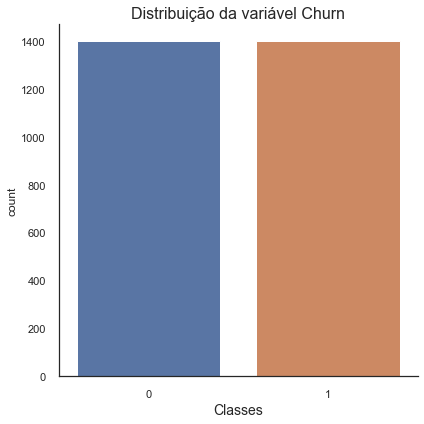

In [28]:
# Garantindo replicabilidade
np.random.seed(2645)

# Modelo para balancear os dados
und = RandomUnderSampler()

X_und, y_und = und.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print('\033[1m' + "Entradas da variável Churn após o balanceamento:" + '\033[0m')
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável Churn
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição da variável Churn", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

Como podemos notar, o conjunto de ficou balanceado apresentando 50% de entradas para cada classe da variável `Churn`.

Assim, vou aplicar a validação cruzada em diferentes modelos de *Machine Learning*, com o intuito de avaliar qual(is) apresenta(m) o(s) melhor(es) desempenho(s). Para utilizarei os dados de treino que foram balanceados. Os modelos selecionados são:
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=classifier#sklearn.ensemble.RandomForestClassifier);
- [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html);
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html).

In [29]:
# Garantindo replicabilidade
np.random.seed(2645)

# Definindo os modelos
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

modelo = []
auc = []

# Avaliando o desempenho (AUC)
for clf in (dt, rf, xgb, lgbm):
    modelo.append(clf.__class__.__name__)
    auc.append(val_modelo(clf, X_und, y_und, quite=True))
    
pd.DataFrame(data=auc, index=modelo, columns=['AUC'])

,AUC
DecisionTreeClassifier,0.689312
RandomForestClassifier,0.830705
XGBClassifier,0.820450
LGBMClassifier,0.832522


Notamos pelo desempenho dos modelos que:
- O *DecisionTreeClassifier* não mostrou uma melhora significativa utilizando os dados balanceados em relação *baseline*.
- Os modelos *RandomForestClassifier* e *XGBClassifier* mostraram desempenhos bem semelhantes.
- O modelo *LGBMClassifier* mostrou um desempenho levemente superior aos outros.

Sendo assim, utilizarei o modelo *LGBMClassifier* para fazer a otimização dos parâmetros.

### **Otimização dos parâmetros**

O LightGBM possui diversos parâmetros que podem ser ajustados, alguns afetam mais o desmepenho do modelo e outros menos. Uma boa abordagem é definir uma taxa de aprendizado (`learning_rate`) e número de estimadores (`n_estimators`), fazer o ajuste de outros parâmetros e, no fim, verificar outras taxas de aprendizado.

Irei começar ajustando o número de estimadores e para isso foi definido o `learning_rate` como sendo 0.1.

In [30]:
# Garantindo replicabilidade
np.random.seed(2645)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate=0.1)

# Definindo o parâmetro a ser ajustado
param_grid = {'n_estimators': range(0, 1000, 50)}

# Definindo o kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Identificando o melhor parâmetro
lgbm_grid = GridSearchCV(lgbm_model, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
resultado = lgbm_grid.fit(X_und, y_und)

# Visualizar ajuste
print("Melhor resultado: {}, para {}".format(round(resultado.best_score_, 4), resultado.best_params_))

Melhor resultado: 0.8384, para {'n_estimators': 50}


Com o `n_estimators` definido como 50, vou ajustar o parâmetro `num_leaves`.

In [31]:
# Garantindo replicabilidade
np.random.seed(2645)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate=0.1, n_estimators=50)

# Definindo o parâmetro a ser ajustado
param_grid = {'num_leaves': range(1, 100, 1)}

# Definindo o kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Identificando o melhor parâmetro
lgbm_grid = GridSearchCV(lgbm_model, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
resultado = lgbm_grid.fit(X_und, y_und)

# Visualizar ajuste
print("Melhor resultado: {}, para {}".format(round(resultado.best_score_, 4), resultado.best_params_))

Melhor resultado: 0.848, para {'num_leaves': 7}


Com o valor de 5 para `num_leaves`, vou ajustar os parâmetros `max_depth` e `min_child_weight`.

In [32]:
# Garantindo replicabilidade
np.random.seed(2645)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate=0.1, n_estimators=50, num_leaves=5)

# Definindo o parâmetro a ser ajustado
param_grid = {'max_depth': range(1, 10, 1), 
             'min_child_weight': range(1, 7, 1)}

# Definindo o kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Identificando o melhor parâmetro
lgbm_grid = GridSearchCV(lgbm_model, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
resultado = lgbm_grid.fit(X_und, y_und)

# Visualizar ajuste
print("Melhor resultado: {}, para {}".format(round(resultado.best_score_, 4), resultado.best_params_))

Melhor resultado: 0.8477, para {'max_depth': 4, 'min_child_weight': 6}


E, por fim, vou verificar o `learning_rate` com os 4 resultados obtidos.

In [33]:
# Garantindo replicabilidade
np.random.seed(2645)

# Modelo LightGBM
lgbm_model = LGBMClassifier(n_estimators=50, num_leaves=5, max_depth=4, min_child_weight=6)

# Definindo o parâmetro a ser ajustado
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Definindo o kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Identificando o melhor parâmetro
lgbm_grid = GridSearchCV(lgbm_model, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
resultado = lgbm_grid.fit(X_und, y_und)

# Visualizar ajuste
print("Melhor resultado: {}, para {}".format(round(resultado.best_score_, 4), resultado.best_params_))

Melhor resultado: 0.8477, para {'learning_rate': 0.1}


Percebemos que o `learning_rate` otimizado ficou em 0.1 mesmo, considerando o `AUC` como sendo a única métrica de importância (premissa definida por esse autor).

Com isso, vamos treinar o modelo com todos os parâmetros otimizados e então verificaremos o desempenho final utilizando os dados de teste. Sendo que esse será o primeiro contato com os dados de teste.

In [34]:
# Garantindo replicabilidade
np.random.seed(2645)

# Construindo o modelo final
lgbm_final = LGBMClassifier(learning_rate=0.1, n_estimators=50, num_leaves=5, max_depth=4, min_child_weight=6)
lgbm_final.fit(X_und, y_und)

# Fazendo previsões
y_pred = lgbm_final.predict(X_test)

# Relatório de classificação
print("Relatório de classificação:\n", classification_report(y_test, y_pred, digits=4))

# AUC
print("Área sob a curva (AUC):\t{}".format(round(roc_auc_score(y_test, y_pred), 4)))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9068    0.7442    0.8175      1294
           1     0.5265    0.7880    0.6312       467

    accuracy                         0.7558      1761
   macro avg     0.7166    0.7661    0.7244      1761
weighted avg     0.8059    0.7558    0.7681      1761

Área sob a curva (AUC):	0.7661


Ainda, faremos a matriz de confusão:

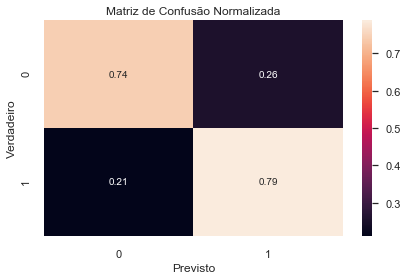

In [35]:
# Matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)

ax.set_title('Matriz de Confusão Normalizada')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.tight_layout()

E, também, vou plotar a curva ROC:

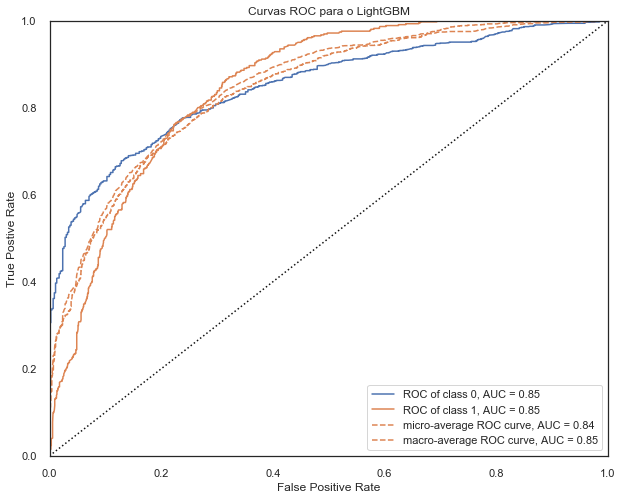

In [36]:
# Garantindo replicabilidade
np.random.seed(2645)

# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_lgbm = ROCAUC(lgbm_model, classes=[0, 1], title="Curvas ROC para o LightGBM")

vis_lgbm.fit(X_und, y_und); # Ajusta os dados de treino ao visualizador
vis_lgbm.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_lgbm.show(); # Finaliza e mostra a figura

## **Considerações finais**

Os dados de teste não foram passados para o modelo, apenas na verificação final do modelo com os parâmetros ajustados, e, ainda, assim apresentou um desempenho próximo (`0,7661`) aos estimados apenas com os dados de treino (`0,8477`), isso ocorre devido a uma boa otimização dos parâmetros.

Também, percebe-se que fazendo o balanceamento da variável objetivo (nesse caso a variável `Churn`), os modelos apresentam uma melhora considerável no desempenho.

## **Aplicações**

Mas e agora você pode estar se perguntando:
> **Mas eu não trabalho em empresa que vende serviços ou não precisa de assinatura para obter o produto da minha empresa?**

Ou ainda

> **A empresa que trabalho ou meu negócio vende apenas para outras empresas (CNPJs) ou varejistas?**

Para esses casos, diversas abordagens podem ser utilizados, vou citar apenas alguns exemplos:
- No caso de venda de produtos finais, pode fazer uma análise de quanto tempo um cliente não compra do seu produto ou na sua empresa através dos cadastros dos clientes ou dos clientes que informam CPF no momento da compra;
- Para empresas que vendem produtos para CNPJs ou varejistas pode-se criar um questionário para os clientes deles tendo como pergunta principal: "Você consome o produto da marca XYZ?", mas lembrando que o questionário deve ser criado de acordo com o produto vendido, porque, por exemplo, a renda familiar pode ser ou não um fator essencial para compra de determinado produto.

Ainda há diversas formas de se utilizar, cabe a pessoa que conhece o tipo de negócio da empresa e o cientista de dados definirem a melhor abordagem para desensolver um projeto nessa área.

## **Referências Bibliográficas**

Churn Rate: o que é e como reduzir para sua empresa crescer. 13 de abril de 2020. Disponível em: < https://resultadosdigitais.com.br/blog/o-que-e-churn/ >.

FADIYAH, S. Churn Rate: Definition and Why It Matters. 12  de agosto de 2020. Disponível em: < https://www.hashmicro.com/blog/churn-rate-definition/ >.

Churn rate. Disponível em: < https://en.wikipedia.org/wiki/Churn_rate >.

FRANKENFIELD, J. Churn Rate. 25 de maio de 2020. Disponível em: < https://www.investopedia.com/terms/c/churnrate.asp >.

GABRIEL, L. Você sabe o que é churn rate? Entenda por que você precisa diminuir essa taxa no seu negócio!. 3  de junho de 2020. Disponível em: < https://rockcontent.com/br/blog/churn-rate/ >.

RYU, T. Variáveis Dummy: o que é? Quando usar? E como usar?. 2  de novembro de 2020. Disponível em: < https://medium.com/data-hackers/vari%C3%A1veis-dummy-o-que-%C3%A9-quando-usar-e-como-usar-78de66cfcca9 >.

THENRAJ, P. Do Decision Trees need Feature Scaling?. 21 de junho de 2020. Disponível em: < https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6 >.

RODRIGUES, V. Entenda o que é AUC e ROC nos modelos de Machine Learning. 26 de outubro de 2018. Disponível em: < https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772 >.

random.seed() in Python. 16 de maio de 2020. Disponível em: < https://www.geeksforgeeks.org/random-seed-in-python/ >.